In [1]:
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [14]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading the dataset

In [15]:
config_path = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/csa_lstm/000.json'
with open(config_path) as f:
    config = json.load(f)

In [17]:
train_dataloader = datasets.setup.prepare_dataloader(config, 'train')

val_dataloader = datasets.setup.prepare_dataloader(config, 'val')

model = models.setup.prepare_model(config, train_dataloader.dataset.input_shape)

<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational seq

  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]


<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/waterfall.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integr

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the


<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.c

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /wor

<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bass_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...
<Status>: Check

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/telephone_bell_ring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Succes

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snoring.csd ...
<Statu

<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/raindrop.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the int

<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/firetruck_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/b

<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from

<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/vacuum_cleaner.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequenc

  0%|          | 0/101 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tambourine.csd ...
<Status>: Chec

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data 

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of 

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/child_speech.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/female_singing.csd ...
<Status>

<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/faucet.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/church_bell.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /w

<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/wa

<Status>: Checking the integrity of the data in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/t

<Status>: Checking the integrity of the data in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


  0%|          | 0/97 [00:00<?, ? Computational Sequence Entries/s]

<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational seq

  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fireworks.csd ...
<Status>: Checking the

  0%|          | 0/96 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bird.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.c

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/1600

<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snoring.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/raindrop.csd ...
<Status>: Checking

  0%|          | 0/93 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/trumpet.csd ...
<Status>: Checki

<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_speech.csd ...
<Status>: Checking the integrity of

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/duck.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine.csd ...
<Status>: Checking the integrity of the data in <cut_

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/female_singing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/

<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/wa

<Status>: Checking the integrity of the data in <cut_normalized_16000_engine_idling> computational sequence ...
<Success>: <cut_normalized_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine_idling> computational sequence ...
<Success>: <cut_normalized_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bark.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


In [18]:
loss_fn = loss_functions.setup.prepare_loss_fn(config)

In [83]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']
    break

print(model_input.shape)
print(ground_truths.shape)

torch.Size([32, 2, 167, 129])
torch.Size([32, 2, 2, 167, 129])


In [129]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, config, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=config['dataset']['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, config, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=config['dataset']['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [130]:
batch_idx = 4
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

sample_input.size()

torch.Size([2, 167, 129])

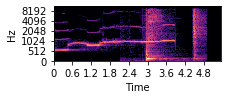

In [131]:
visualize_input(sample_input, config, 'spectrogram')

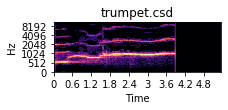

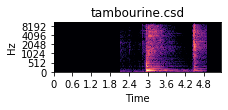

In [133]:
visualize_output(sample_gt, config, 'spectrogram', class_names=sample_components)

In [134]:
input_pcm = visualize_input(sample_input, config, 'pcm')
output_pcms = visualize_output(sample_output, config, 'pcm')

NameError: name 'sample_output' is not defined

In [121]:
IPython.display.Audio(data=input_pcm, rate=config['dataset']['config']['sample_rate'])

In [278]:

    
def get_spect(data, fs, nperseg, noverlap):
    print(data.numpy().shape)
    r = np.split(data.numpy().T, 2)[0]
    print(r.shape)
    i = np.split(data.numpy().T, 2)[1]
    c = r + 1j * i
    
    rev = scipy.signal.istft(c, nperseg=nperseg, noverlap=noverlap)
    return c, rev

def get_spects(ground_truths, fs, nperseg, noverlap, xid=0):
    _, seq_len, nsource, input_dim = ground_truths.shape
    
    c_gts = []
    revs = []
    for i in range(nsource):
        gt = ground_truths[xid, :, i].cpu()
        c_gt, rev = get_spect(gt, fs, nperseg, noverlap)

        c_gts.append(c_gt)
        revs.append(rev)
    
    return c_gts, revs

visualize sample data

In [279]:
xid = 0
nsource = 2
fs = 44100
nperseg = 256
noverlap = nperseg // 4
agg_sample = aggregate[xid]
c_agg, agg_data = get_spect(agg_sample, fs=fs, nperseg=nperseg, noverlap=noverlap)
cgts, revs = get_spects(ground_truths, fs=fs, nperseg=nperseg, noverlap=noverlap, xid=xid)

(460, 258)
(129, 460)
(460, 258)
(129, 460)
(460, 258)
(129, 460)


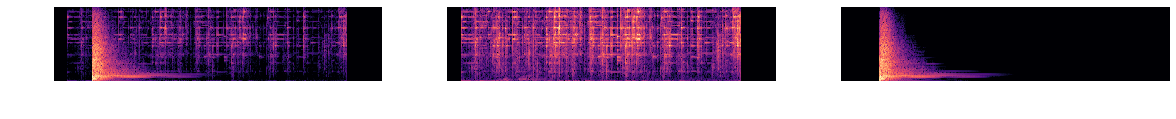

In [280]:
fig = plt.figure(figsize=(20, 3))
cs = [c_agg] + cgts
for i, c in enumerate(cs):
    plt.subplot(2, 3, i + 1)
    display(c, fs)
    plt.axis('off')

In [281]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [282]:
import model.transformer
_, seq_len, input_dim = aggregate.shape
print(seq_len)
print(input_dim)
# net = model.transformer.make_model(freq_range).to(device)
net = model.models.B1(input_dim=input_dim,
                        seq_len=seq_len,
                        hidden_size=100,
                        num_sources=2).to(device)

# checkpoint = torch.load('/home/ubuntu/multimodal-listener/results/2-20000-2_euclidean_LSTM_190713/config_4/snapshots/best.tar')

# net.load_state_dict(checkpoint['model_state_dict'])

460
258


In [283]:
preds = net(aggregate.to(device))
# preds = net(aggregate.to(device), ground_truths.to(device), None, subseq_mask)
print(aggregate.shape)
print(preds.shape)
# preds2, _ = net2(aggregate)

torch.Size([4, 460, 258])
torch.Size([4, 460, 2, 258])


In [268]:
cgts, revs = get_spects(preds.detach(), fs=fs, nperseg=nperseg, noverlap=noverlap, xid=xid)

(460, 258)
(129, 460)
(460, 258)
(129, 460)
